In [1]:
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import cv2
import helper

In [12]:
data_dir = 'Data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(200),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(200),
                                      transforms.CenterCrop(200),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=60, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=20)

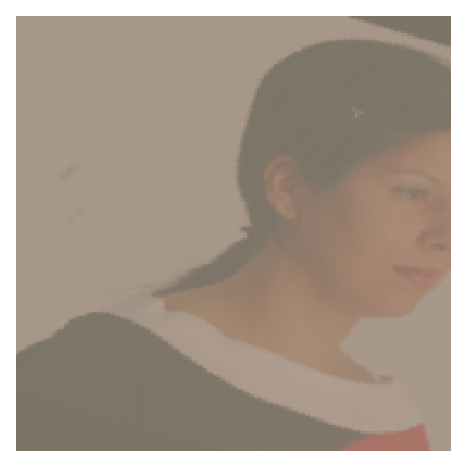

In [13]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

tensor([3, 1, 0, 2, 1, 1, 2, 0, 0, 3, 3, 3, 0, 2, 2, 2, 3, 1, 1, 3, 3, 3, 3, 1,
        3, 2, 3, 0, 0, 1, 3, 2, 2, 1, 0, 2, 0, 1, 3, 1, 3, 0, 1, 0, 1, 1, 2, 1,
        0, 3, 0, 1, 3, 2, 0, 0, 0, 1, 2, 2])


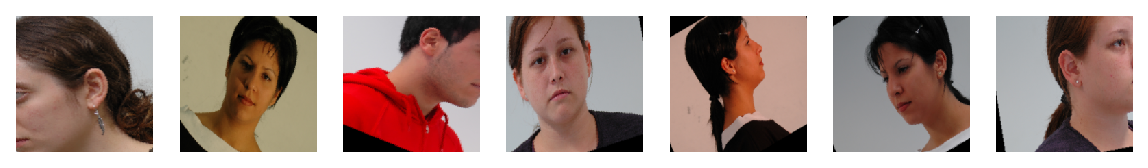

In [32]:
data_iter = iter(trainloader)
images, labels = next(data_iter)
print(labels)
fig, axes = plt.subplots(figsize=(10,7), ncols=7)

for ii in range(7):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [33]:
from torch import nn, optim
import torch.nn.functional as F

In [34]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(120000, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [35]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [36]:
epochs = 30

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 13.507178544998169
Training loss: 38.67277908325195
Training loss: 19.81044340133667
Training loss: 10.732675075531006
Training loss: 7.428048849105835


torch.Size([1, 120000])


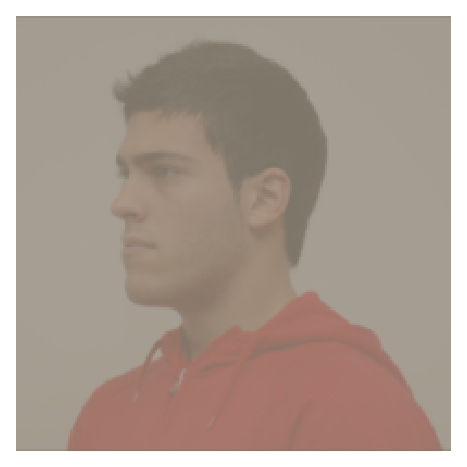

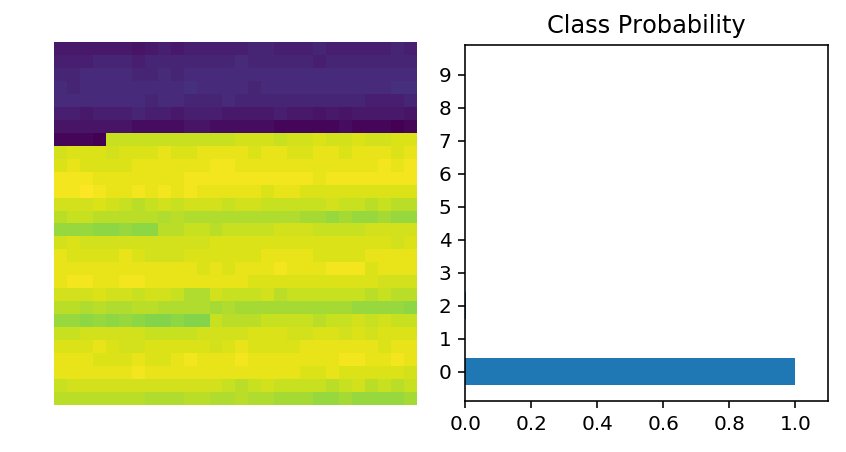

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images.view(images.shape[0], -1)
img = images[1].view(1,120000)
print(img.shape)
helper.imshow(images[1,:]);

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps,)